In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]

# ensure tmask has same dimensions as field
tmask = tmask.rename({'z' : 'deptht'})

In [3]:
# make land versions of cmaps, land is grey
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')

In [5]:
base = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_again/SalishSea_1h_20230301_20230301_grid_T.nc')
tands = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands//SalishSea_1h_20230301_20230301_grid_T.nc')
tands5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_5day/SalishSea_1h_20230301_20230305_grid_T.nc')
tands_small = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_small_again/SalishSea_1h_20230301_20230301_grid_T.nc')
base5 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/base_5day/SalishSea_1h_20230301_20230305_grid_T.nc')
tands_mark = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/tands_markplume/SalishSea_1h_20230301_20230305_grid_T.nc')
tands_mark

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 120)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2023-03-01T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20230301_20230305_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Sep-28 00:51:51 GMT
    uuid:         dd652558-c4b7-4d5b-84d8-31c46a9cd895

In [6]:
def plotSumDiff(base, new, t5, field, index1, index2, index3):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff_time1 = sum_diff.isel(time_counter = index1)
    sum_diff_time1.plot(ax=axs[0], y = "deptht", yincrease = False, color = 'blue')
    axs[0].set_title(f'Sum of difference in {field} at {index1}')

    sum_diff_time2 = sum_diff.isel(time_counter = index2)
    sum_diff_time2.plot(ax=axs[1], y = "deptht", yincrease = False, color = 'blue')
    axs[1].set_title(f'Sum of difference in {field} at {index2}')

    sum_diff_time3 = sum_diff.isel(time_counter = index3)
    sum_diff_time3.plot(ax=axs[2], y = "deptht", yincrease = False, color = 'blue')
    axs[2].set_title(f'Sum of difference in {field} at {index3}')

    diff5 = t5[field]- base[field]
    sum_diff5 = diff5.sum(dim = ["y", "x"])
    sum_diff_time5 = sum_diff5.isel(time_counter = index1)
    sum_diff_time5.plot(ax=axs[0], y = "deptht", yincrease = False, color = 'orange')
    axs[0].set_title(f'Sum of difference in {field} at {index1}')

    sum_diff_time6 = sum_diff5.isel(time_counter = index2)
    sum_diff_time6.plot(ax=axs[1], y = "deptht", yincrease = False, color = 'orange')
    axs[1].set_title(f'Sum of difference in {field} at {index2}')

    sum_diff_time7 = sum_diff5.isel(time_counter = index3)
    sum_diff_time7.plot(ax=axs[2], y = "deptht", yincrease = False, color = 'orange')
    axs[2].set_title(f'Sum of difference in {field} at {index3}')

    plt.show()
    


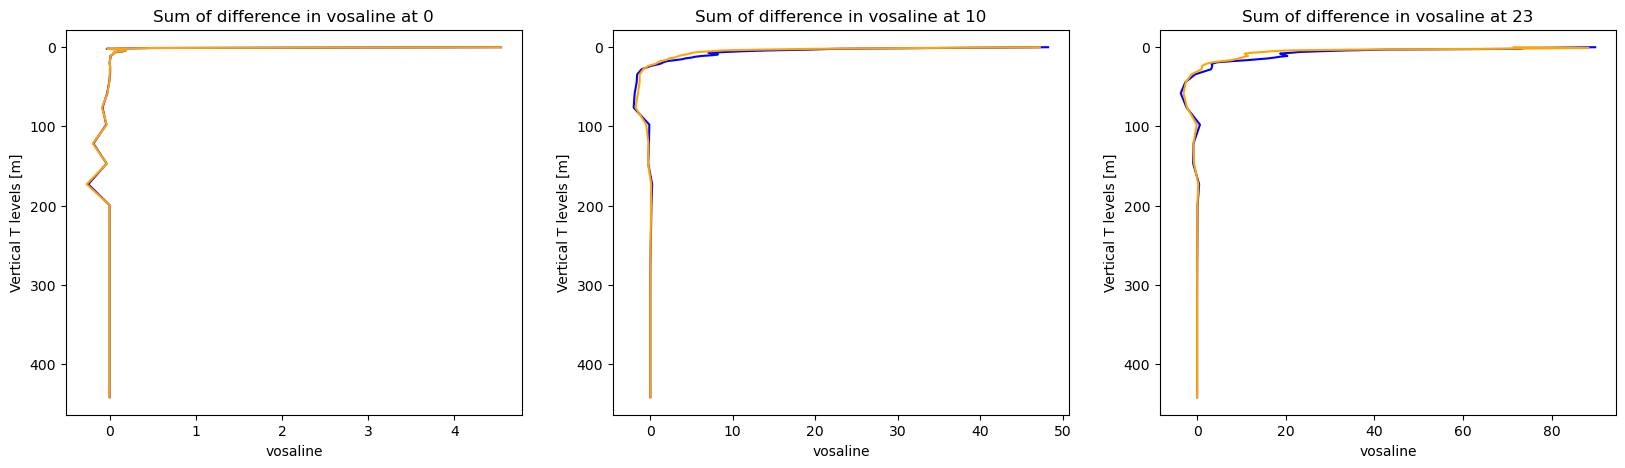

In [7]:

iz = 30
y_slice=slice(400+iz, 500-iz)
x_slice=slice(250+iz, 350-iz)

base1 = base.sel(y = y_slice, x = x_slice)
tands1 = tands.sel(y = y_slice, x = x_slice)
tandsFive = tands5.sel(y = y_slice, x = x_slice)
tands_sma = tands_small.sel(y = y_slice, x = x_slice)
base_five = base5.sel(y = y_slice, x = x_slice)
plotSumDiff(base1, tands1, tandsFive, 'vosaline', 0, 10, 23)

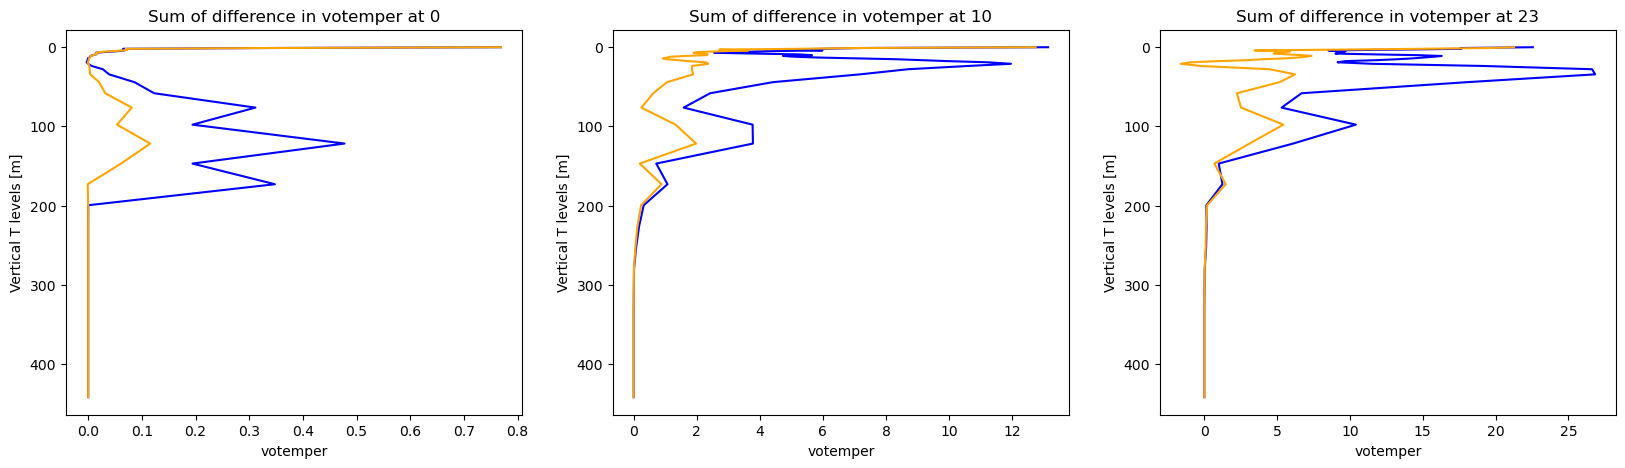

In [31]:
plotSumDiff(base1, tands1, tandsFive, 'votemper', 0, 10, 23)

In [7]:
def plotSumDiffTime(base, new, t5, t_small, field, vmin, vmax, cmp):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax = axs[0], y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs[0].set_title(f'Time Series for Sum of difference for {field}')

    diff5 = t5[field]- base[field]
    sum_diff5 = diff5.sum(dim = ["y", "x"])
    sum_diff5.plot(ax=axs[1], y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs[1].set_title(f'Time Series for Sum of difference for {field} (tands5)')

    diff_small = t_small[field]- base[field]
    sum_diff_small = diff_small.sum(dim = ["y", "x"])
    sum_diff_small.plot(ax=axs[2], y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    axs[2].set_title(f'Time Series for Sum of difference for {field} (tandsSmall)')

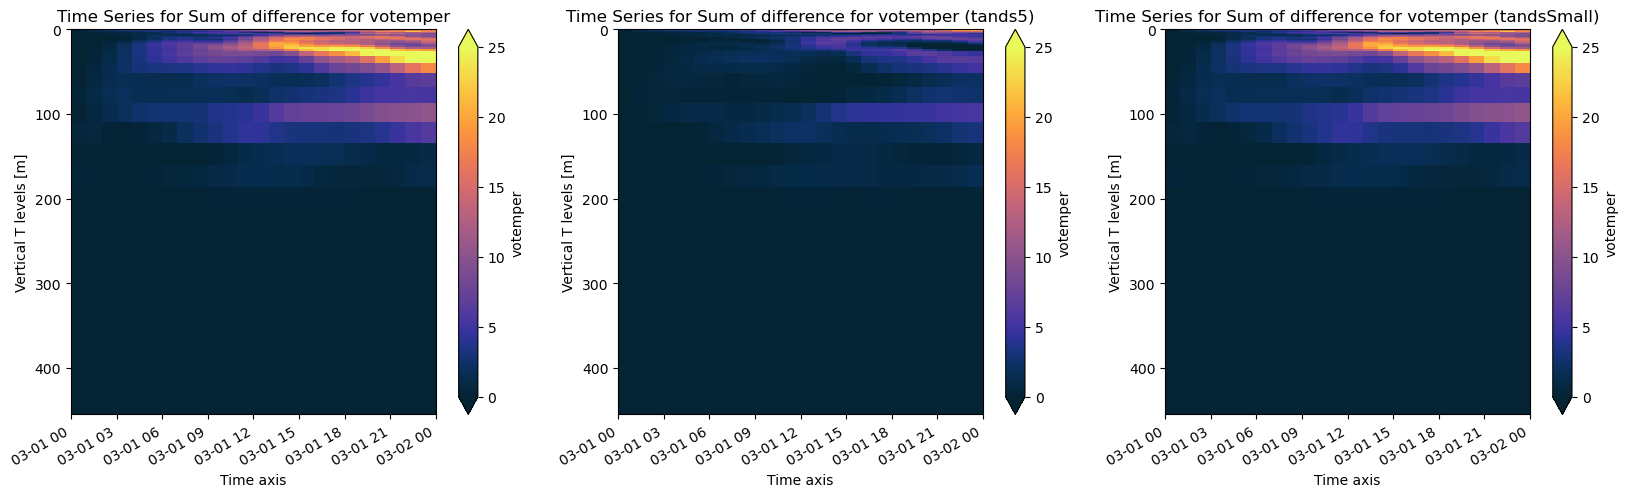

In [28]:
plotSumDiffTime(base1, tands1, tandsFive, tands_sma, 'votemper', 0, 25, cm_temp)

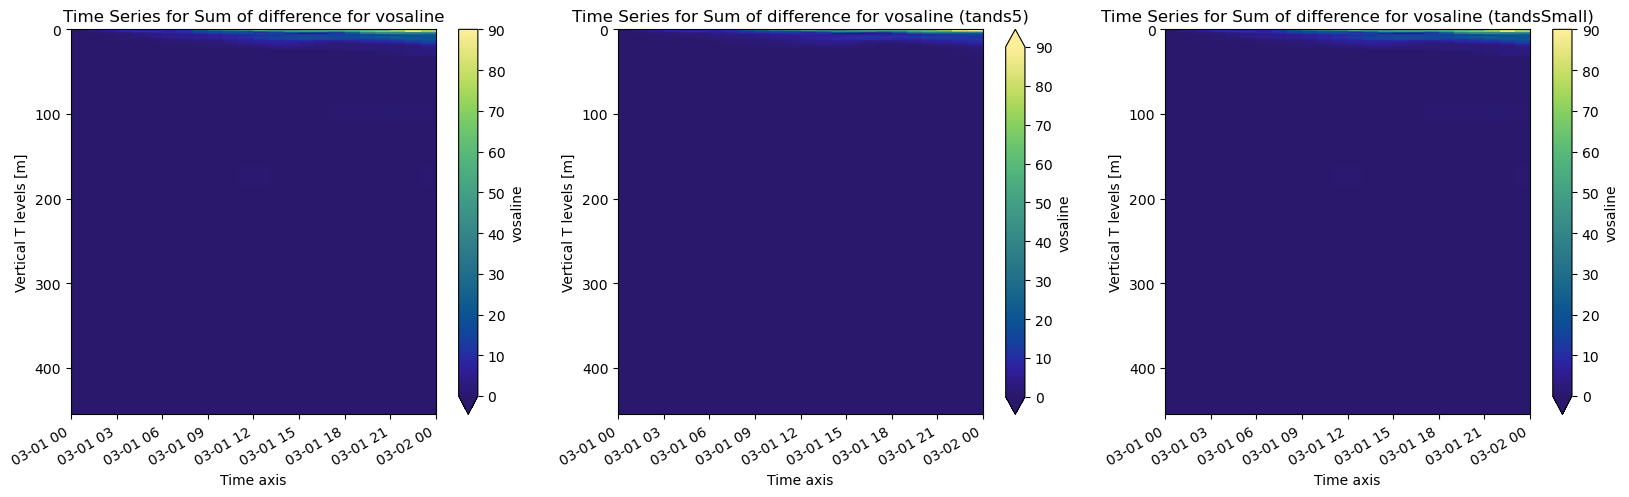

In [11]:
plotSumDiffTime(base1, tands1, tandsFive, tands_sma, 'vosaline', 0, 90, cm_salt)

In [12]:
base_five_slice = base_five.isel(time_counter = slice(0, 119))
tandsFive_slice = tandsFive.isel(time_counter = slice(0, 119))

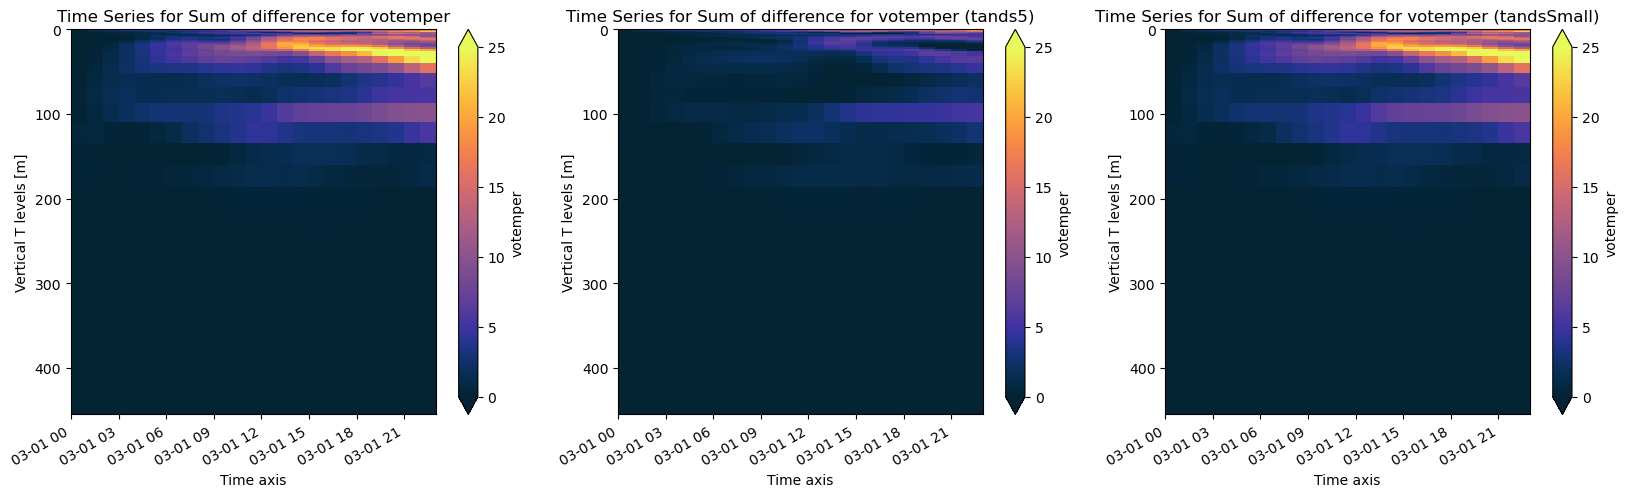

In [13]:
plotSumDiffTime(base_five_slice, tands1, tandsFive_slice, tands_sma, 'votemper', 0, 25, cm_temp)

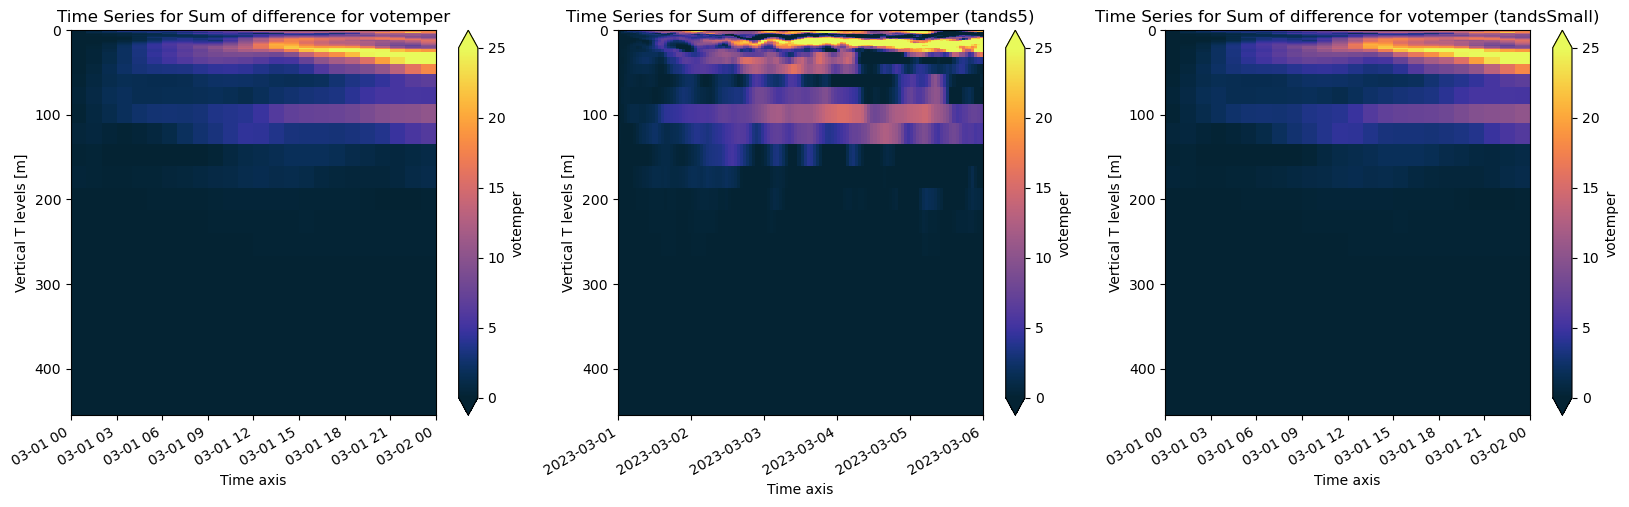

In [8]:
plotSumDiffTime(base_five, tands1, tandsFive, tands_sma, 'votemper', 0, 25, cm_temp)

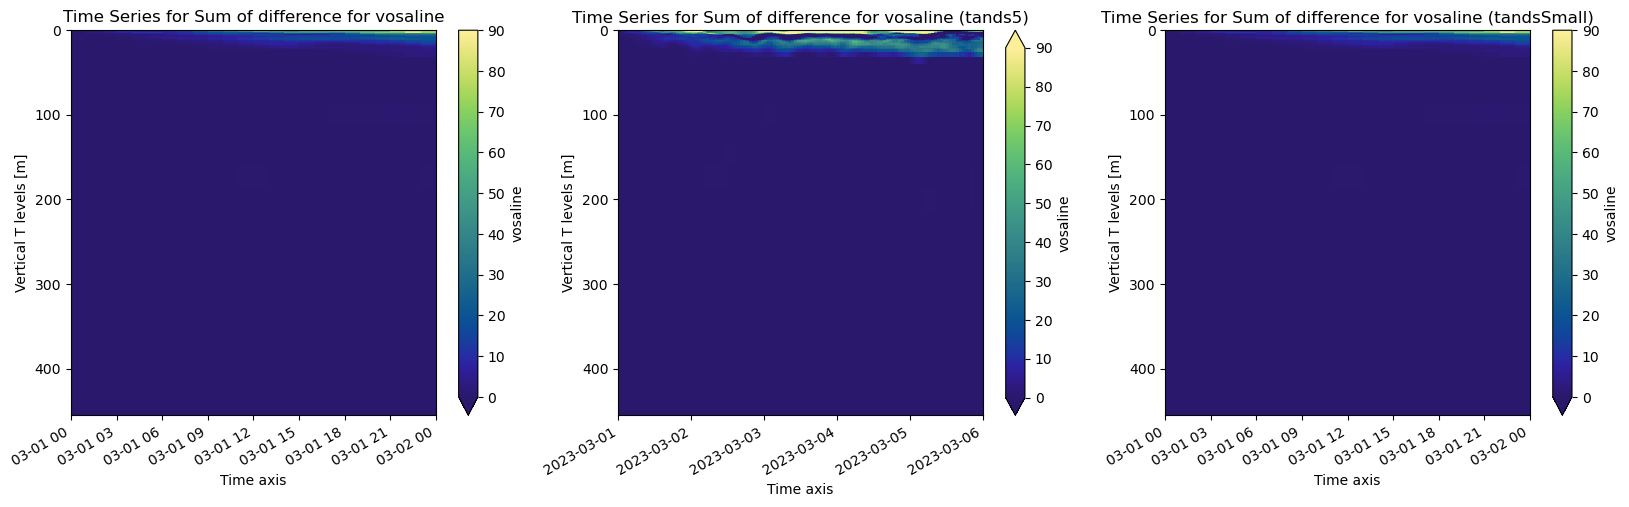

In [9]:
plotSumDiffTime(base_five, tands1, tandsFive, tands_sma, 'vosaline', 0, 90, cm_salt)

In [17]:
def plotForBaseTandsFive(base, new, field, vmin, vmax, cmp):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))
    diff = new[field]- base[field]
    sum_diff = diff.sum(dim = ["y", "x"])
    sum_diff.plot(ax = ax, y = "deptht", yincrease = False, vmin = vmin, vmax = vmax, cmap = cmp)
    ax.set_title(f'Time Series for Sum of difference for {field}')

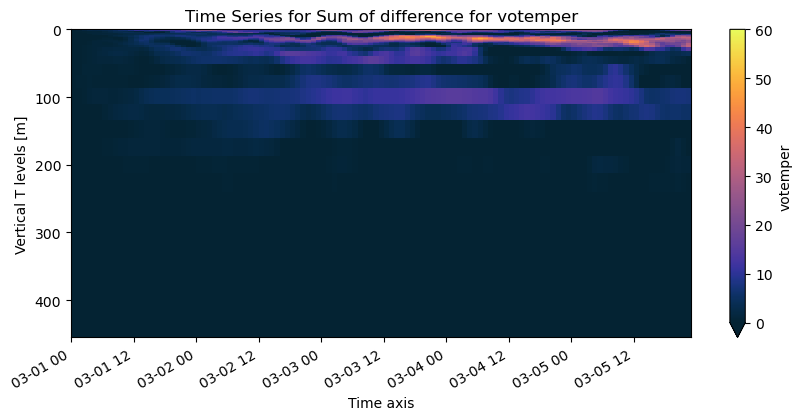

In [18]:
plotForBaseTandsFive(base_five_slice, tandsFive_slice, 'votemper', 0, 60, cm_temp)